NAME: PILLAGOLLA JAYAKRISHNA

GMAIL ID:jayakrishnap05789@gmail.com

##Project-1:- Performing Analysis of Meteorological Data

In this blog we are to perform analysis on the given 'WeatherHistory' dataset for testing the hypothesis and finally put-forth the conclusion.
The Null Hypothesis is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global Warming".
We need to find whether the average Apparent Temperature for a month say April starting from year 2006 to 2016 and the average Humidity for the same period has increased or not. 
This monthly analysis has to be done for all 12 months over the 10 year period. 
So we're basically resampling our data from hourly to monthly, then comparing the same month over the 10 year period. 
Also we have to support our analysis by appropriate visualizations.

Required Python libraries for the analysis are NumPy, Pandas & Matplotlib

The dataset can be downloaded from Kaggle - (Source URL: https://www.kaggle.com/muthuj7/weather-dataset).

In [56]:
import warnings
warnings.simplefilter('ignore')

## Importing required libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

We will use our 'Formatted Date' column as the index.

In [58]:
dataset = pd.read_csv('WeatherHistory.csv', index_col='Formatted Date')

## Performing EDA

In [59]:
df = dataset.copy()
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [60]:
df.tail()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [61]:
df.shape

(96453, 11)

In [62]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [63]:
df.var()

Temperature (C)                91.232037
Apparent Temperature (C)      114.422544
Humidity                        0.038210
Wind Speed (km/h)              47.797464
Wind Bearing (degrees)      11531.200691
Visibility (km)                17.573897
Loud Cover                      0.000000
Pressure (millibars)        13681.958835
dtype: float64

In [64]:
df.std()

Temperature (C)               9.551546
Apparent Temperature (C)     10.696847
Humidity                      0.195473
Wind Speed (km/h)             6.913571
Wind Bearing (degrees)      107.383428
Visibility (km)               4.192123
Loud Cover                    0.000000
Pressure (millibars)        116.969906
dtype: float64

In [65]:
df.kurtosis

<bound method DataFrame.kurt of                                      Summary  ...                           Daily Summary
Formatted Date                                ...                                        
2006-04-01 00:00:00.000 +0200  Partly Cloudy  ...       Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200  Partly Cloudy  ...       Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200  Mostly Cloudy  ...       Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200  Partly Cloudy  ...       Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200  Mostly Cloudy  ...       Partly cloudy throughout the day.
...                                      ...  ...                                     ...
2016-09-09 19:00:00.000 +0200  Partly Cloudy  ...  Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200  Partly Cloudy  ...  Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200  Partly Cloudy  ...  Partly cloudy sta

In [66]:
df.count()

Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [67]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [68]:
df.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Loud Cover                     1
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [70]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [71]:
type(df)

pandas.core.frame.DataFrame

In [72]:
df.index

Index(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', '2006-04-01 03:00:00.000 +0200',
       '2006-04-01 04:00:00.000 +0200', '2006-04-01 05:00:00.000 +0200',
       '2006-04-01 06:00:00.000 +0200', '2006-04-01 07:00:00.000 +0200',
       '2006-04-01 08:00:00.000 +0200', '2006-04-01 09:00:00.000 +0200',
       ...
       '2016-09-09 14:00:00.000 +0200', '2016-09-09 15:00:00.000 +0200',
       '2016-09-09 16:00:00.000 +0200', '2016-09-09 17:00:00.000 +0200',
       '2016-09-09 18:00:00.000 +0200', '2016-09-09 19:00:00.000 +0200',
       '2016-09-09 20:00:00.000 +0200', '2016-09-09 21:00:00.000 +0200',
       '2016-09-09 22:00:00.000 +0200', '2016-09-09 23:00:00.000 +0200'],
      dtype='object', name='Formatted Date', length=96453)

##Uniqnueness of Data

In [73]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [74]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [75]:
df['Temperature (C)'].unique()

array([ 9.47222222,  9.35555556,  9.37777778, ..., 28.47222222,
       28.33888889, 30.60555556])

In [76]:
df['Apparent Temperature (C)'].unique()

array([ 7.38888889,  7.22777778,  9.37777778, ..., 12.14444444,
        9.73888889,  9.23333333])

In [77]:
df['Humidity'].unique()

array([0.89, 0.86, 0.83, 0.85, 0.95, 0.82, 0.72, 0.67, 0.54, 0.55, 0.51,
       0.47, 0.46, 0.6 , 0.63, 0.69, 0.7 , 0.77, 0.76, 0.79, 0.62, 0.66,
       0.8 , 0.78, 0.61, 0.52, 0.4 , 0.37, 0.36, 0.43, 0.5 , 0.53, 0.58,
       0.59, 0.87, 0.93, 0.84, 0.73, 0.71, 0.74, 0.81, 0.9 , 0.99, 0.96,
       0.75, 0.88, 0.65, 0.91, 0.94, 0.92, 0.44, 0.56, 0.68, 0.64, 0.48,
       0.57, 0.98, 1.  , 0.38, 0.41, 0.45, 0.49, 0.32, 0.42, 0.35, 0.39,
       0.97, 0.34, 0.33, 0.31, 0.3 , 0.29, 0.27, 0.28, 0.26, 0.24, 0.25,
       0.23, 0.19, 0.17, 0.2 , 0.15, 0.18, 0.22, 0.14, 0.21, 0.16, 0.13,
       0.  , 0.12])

In [78]:
df['Wind Speed (km/h)'].unique()

array([14.1197, 14.2646,  3.9284, ..., 37.0622, 35.5971, 30.751 ])

In [79]:
df['Wind Bearing (degrees)'].unique()

array([251., 259., 204., 269., 258., 260., 279., 290., 316., 281., 289.,
       262., 288., 230., 163., 139., 147., 160., 152., 150., 149., 180.,
       161., 135., 141., 151., 169., 170., 187., 179., 162., 159., 168.,
        32., 140., 103., 113., 129., 207., 153.,   4., 341.,  15., 348.,
       321., 311., 339., 340., 330.,  19., 277.,   9.,   0., 350., 349.,
       338., 320., 310., 328.,  20.,  28.,  11., 326., 309., 193., 273.,
       300., 307., 319., 318., 243., 177., 172., 142., 130., 359., 166.,
       145., 178., 223., 240., 231., 214., 222., 241., 235., 238., 211.,
       221., 215., 224., 358.,   8.,  59.,  63.,  65., 146., 305., 327.,
       271., 297., 301., 308., 272., 351., 175., 138., 158., 132., 209.,
       250., 295., 280., 270., 239., 242., 266., 278., 325., 282., 274.,
       255.,  46., 284., 283., 313., 345.,  16., 332.,  12.,  39.,   3.,
        33.,  24.,  25.,  31.,  47.,  67.,  60., 144.,  57.,   2.,  18.,
        48.,  29., 335., 228., 315.,  40., 143., 13

In [80]:
df['Visibility (km)'].unique()

array([1.58263e+01, 1.49569e+01, 9.98200e+00, 1.12056e+01, 1.14471e+01,
       1.12700e+01, 1.10285e+01, 6.19850e+00, 8.05000e+00, 1.03523e+01,
       6.69760e+00, 9.90150e+00, 5.97310e+00, 1.08031e+01, 1.06743e+01,
       1.08192e+01, 1.07548e+01, 1.08997e+01, 1.08514e+01, 1.10768e+01,
       1.08836e+01, 7.61530e+00, 2.65650e+00, 3.81570e+00, 4.49190e+00,
       4.44360e+00, 5.68330e+00, 3.10730e+00, 3.20390e+00, 1.40553e+01,
       6.11800e+00, 6.16630e+00, 7.96950e+00, 6.34340e+00, 1.05455e+01,
       1.49086e+01, 1.50052e+01, 1.58746e+01, 1.00464e+01, 1.00303e+01,
       1.19784e+01, 1.41680e+01, 5.92480e+00, 1.22360e+00, 7.21280e+00,
       1.11251e+01, 1.33791e+01, 1.13988e+01, 1.12861e+01, 1.56975e+01,
       1.48764e+01, 6.84250e+00, 1.53594e+01, 4.29870e+00, 4.12160e+00,
       4.76560e+00, 2.93020e+00, 5.84430e+00, 9.61170e+00, 9.67610e+00,
       2.01250e+00, 5.21640e+00, 1.45866e+01, 1.56009e+01, 1.47154e+01,
       6.11800e-01, 3.63860e+00, 1.11090e+00, 5.15200e-01, 4.347

In [81]:
df['Pressure (millibars)'].unique()

array([1015.13, 1015.63, 1015.94, ...,  998.11,  998.52,  997.59])

In [82]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

## Data Cleaning

In [83]:
df.index.dtype

dtype('O')

In [84]:
df.index = pd.to_datetime(df.index, utc=True)

We will resample our dataset and include only the required columns for our analysis.

In [85]:
data_cols = ['Apparent Temperature (C)', 'Humidity']

df_monthly_avg = df[data_cols].resample('MS').mean()
df_monthly_avg.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


Here we've plotted the yearly variation in Apparent Temperature (C) and Humidity over the 10 year period starting from 2006 to 2016.

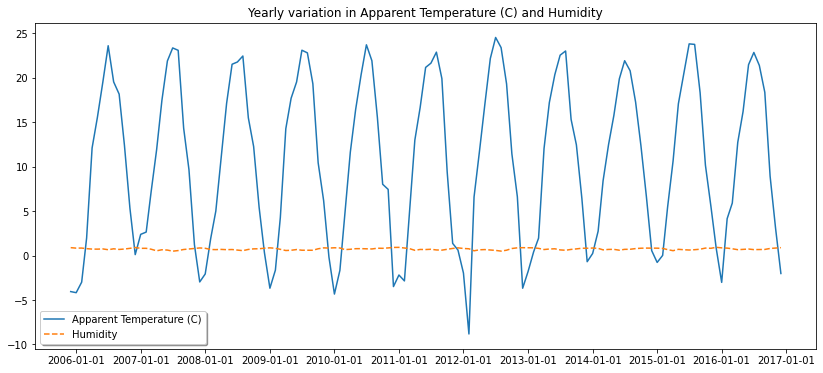

In [86]:
import matplotlib.dates as dts

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_monthly_avg['Apparent Temperature (C)'], '-', label='Apparent Temperature (C)')
ax.plot(df_monthly_avg['Humidity'], '--', label='Humidity')
ax.set_title('Yearly variation in Apparent Temperature (C) and Humidity')
ax.xaxis.set_major_locator(dts.YearLocator())
ax.legend(loc='best', frameon=True, shadow=True)
plt.show()

As we can see that both the peaks and the troughs in the graph are almost same throughout the 10 year period.

In [87]:
data = df_monthly_avg[df_monthly_avg.index.month==4]
data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875


Here is a plot that shows the yearly variation in Apparent Temperature (C) and Humidity for the month of April over the 10 year period starting from 2006 to 2016.

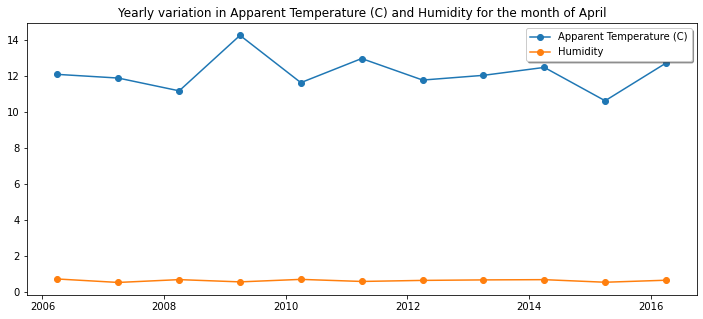

In [88]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data['Apparent Temperature (C)'], '-o', label='Apparent Temperature (C)')
ax.plot(data['Humidity'], '-o', label='Humidity')
ax.set_title('Yearly variation in Apparent Temperature (C) and Humidity for the month of April')
ax.legend(loc='best', frameon=True, shadow=True)
plt.show()

We can clearly see that global warming has caused an uncertain fluctuation of average Apparent Temperature over the past 10 years.
There is a sharp rise of temperature between year 2008-2009 which again decreases in year 2009-2010.
It is observed that the average Apparent Temperature is at its peak in year 2009 which further drops to its lowest in year 2015.
Whereas the average Humidity has remained nearly constant over the period of time.

## Conclusion:

So from our analysis we can conclude that there is no such increase in the average Apparent Temperature and average Humidity 
due to global warming as mentioned in the null hypothesis.